# Figure 4G

### Import packages

In [1]:
import anndata
import ezplot
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pathlib
import seaborn as sns
import sklearn.cluster
import numpy as np
import matplotlib.cm as cm

### Define helper functions

In [2]:
def read_gene_velocity_corr(idx: int, version: int):
    base_path = f"./version_{version}_gene_velocity_corr/{idx}.*.csv"
    paths = glob.glob(base_path)
    
    DataFrames = {}]
    for path in paths:
        fpath = pathlib.Path(path)
        fate = fpath.name.split(".")[1]
        if fate != "Undifferentiated":
            DataFrames[fate] = pd.read_csv(path, index_col = 0)

    return DataFrames

def _adjust_colnames(data, fate: str = "Monocyte"):
    df = data[fate].copy()
    df.columns = [f"{fate}.{key}" for key in df.columns]
    return df

### Two fates

For the two-fate example, we'll use `idx=19977` (`v3`)

In [3]:
data = read_gene_velocity_corr(idx = 19977, version = 3)

In [4]:
df = pd.concat([_adjust_colnames(data, "Monocyte"), _adjust_colnames(data, "Neutrophil")], axis = 1)

In [5]:
df

,Monocyte.f.corr,Monocyte.f.pval,Monocyte.g.corr,Monocyte.g.pval,Neutrophil.f.corr,Neutrophil.f.pval,Neutrophil.g.corr,Neutrophil.g.pval
gene_ids,,,,,,,,
1110002J07Rik,0.246731,0.119912,0.594733,4.121254e-05,0.025470,8.744020e-01,0.406625,8.333975e-03
1110032F04Rik,0.537274,0.000292,0.322823,3.952964e-02,0.533234,3.310762e-04,0.298061,5.838780e-02
1500002F19Rik,0.199835,0.210322,-0.192597,2.276558e-01,-0.679190,1.050207e-06,-0.932045,8.675594e-19
1500026H17Rik,-0.144147,0.368571,-0.669251,1.718679e-06,-0.656420,3.160551e-06,-0.927592,2.872365e-18
1600010M07Rik,-0.666030,0.000002,-0.851748,1.666314e-12,-0.297194,5.915940e-02,-0.664837,2.126375e-06
...,...,...,...,...,...,...,...,...
Zmpste24,0.667209,0.000002,0.913492,8.110006e-17,-0.876496,5.967734e-14,-0.819266,5.826618e-11
Zmynd15,-0.038569,0.810783,0.464953,2.192460e-03,0.329221,3.556725e-02,0.801130,3.157972e-10
Znfx1,-0.624361,0.000013,-0.976683,1.131776e-27,-0.771510,3.547780e-09,-0.961632,1.633703e-23


### Read table of transcription factors (from *Weinreb2020*)

In [7]:
def get_tf_table(df):
    tf_df = pd.read_table(
        "/Users/michaelvinyard/tf_list.txt",
        usecols=[1, 2, 3],
        index_col = 0,
        header=None,
        names=['idx', 'gene_name', 'description'],
    )
    return df.loc[df.index.isin(tf_df['gene_name'].tolist())]

In [8]:
tf_df = get_tf_table(df)
tf_df = tf_df.filter(regex = "corr").copy()

### Plot heatmap for Figure 4G

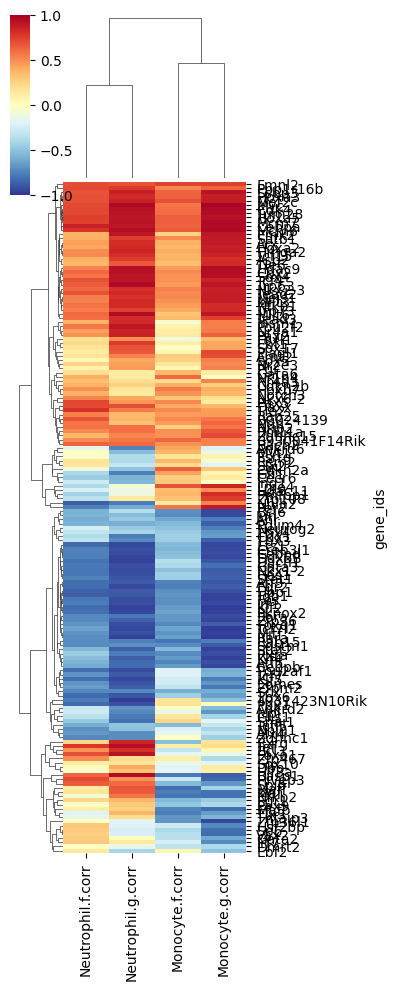

In [10]:
cg = sns.clustermap(
    tf_df,
    vmin = -1,
    vmax = 1,
    cmap = cm.RdYlBu_r, 
    figsize = (4, 10),
    rasterized = True,
    yticklabels = tf_df.index,
)
plt.savefig("Figure4G.svg")